# bias-variance tradeoff

for prediction, minimize **test error** is priority

we have 2 error metrics (empirical risk $\hat R(f)$) for evaluating predictions $\hat f(x_i)$:

- regression: mean squared error

$$
\hat R(f)=MSE=\frac{1}{n}\sum_{i=1}^n \left(y_i - \hat f(x_i)\right)^2
$$

- classification: 0/1 error

$$
\hat R(f)=Err = \frac{1}{n}\sum_{i=1}^n \mathbb{1}\left(y_i \neq \hat f(x_i)\right)
$$

## definition

$$
\begin{align}
Error
&= \text{ {\color{Red}Excess risk}(optimization error) + Noise = {\color{Blue}Variance }+ {\color{Green}Bias }(statistical error) + Noise} \\
&{\color{Red} R(\hat f)-R(f) }= {\color{Blue}R(\hat f)-R(f^*) }+ {\color{Green}R(f^*)-R(f) }
\end{align}
$$


$f$ : true function of population, we never know

$f^{*}$ : optimal function estimate in a model class $M$

$$
f^{*} \in \arg \min_{f\in M}R(f) = \arg \min_{f\in M}\mathbb{E}[\hat R(f)]
$$


$\hat f$ : function estimate in a model class $M$ from **a** training set 

$$
\hat f \in \arg \min_{f\in M}\hat R(f)
$$


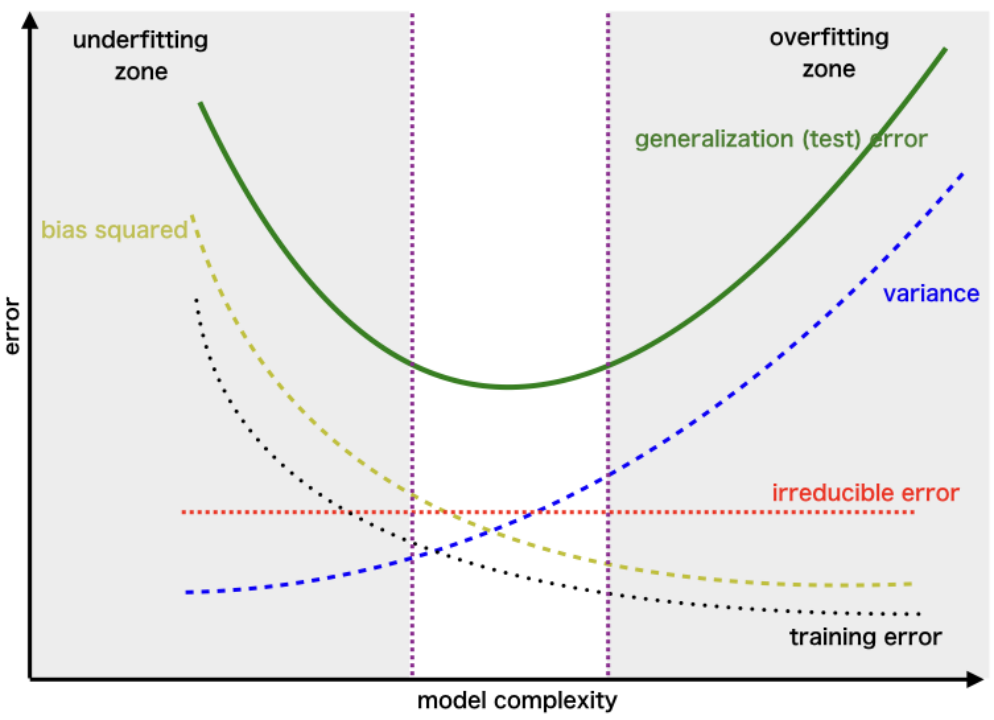

bias ↑   variance ↓

- KNN  	K ↑ (when k=1, function go through every data points, if we change a training set, function will change dramatically)

- tree	Depth ↓

- polynomial regression	degree of polynomial ↓ (Overfitting: n points can be fitted exactly by an n-1 degree polynomial)

- Neural network	# edges ↓

- Model selection	# predictors ↓

- regularization  $\lambda$ ↑

- PCA: $k$ ↓

### variance

- variance is random error

- amount of variability in a predictor $\hat f$ from one **random** data sample to another

- variance increase with increasing model flexibility (complexity)



### bias

- bias is systematic error.

- introduced in model choice, how much inflexibility of model

- Bias decreases with increasing model flexibility
   

### Noise 

- $\sigma^2$ is irreducible error, inherent in error term $\epsilon$ 

## classification

population risk is the probability that my function estimate is wrong $f(X)\neq Y$

$$R(f)=\mathbb{E}[\mathbb{1}(f(X)\neq Y)]=\mathbb{P}(f(X)\neq Y)$$

empirical risk $\hat{R}(f)=\mathbb{1}\left[ \mathbb{P}(y=1|x) > 0.5 \right]$

## regression

model $Y=f(X)+\epsilon $, where $E(\epsilon)=0$ and $Var(\epsilon)=\sigma^2$

Given 
$
\hat R(f)=MSE=\frac{1}{n}\sum_{i=1}^n \left(y_i - \hat f(x_i)\right)^2
$

$$
f^{*} \in \arg \min_{f\in M}R(f) = \arg \min_{f\in M}\mathbb{E}[\hat R(f)] =\arg \min_{f\in M}\mathbb{E}\left[\frac{1}{n}\sum_{i=1}^n \left(y_i - \hat f(x_i)\right)^2\right] 
$$

for predicting a new $Y$ at $X=x$, the expected MSE can be decomposed into:

$
\mathbb{E}(MSE)= \text{Excess Risk + Noise}= \text{Variance + Bias}^2 + Noise
$

$
\mathbb{E}(MSE)=\mathbb{E}\left[\left(Y-\hat f(x)\right)^2\right] =Var\left( \hat f(x)\right)+\left[Bias\left( \hat f(x)\right)\right]^2+\sigma^2
$



where

$
Var\left( \hat f(x)\right)=\mathbb{E}\left[ \left(\hat f(x)-\mathbb{E}\hat f(x)\right)^2\right]
$

$
Bias\left( \hat f(x)\right)=f(x)-\mathbb{E}\hat f(x)
$

$\sigma^2$ is noise

$$
\mathbb{E}\left[\left(Y-\hat f(x)\right)^2\right] =\mathbb{E}\left[ \left(\hat f(x)-\mathbb{E}\hat f(x)\right)^2\right]+\left ( f(x)-\mathbb{E}\hat f(x) \right )^2+\sigma^2
$$

### Proof

insert $\mathbb{E}\hat f(x)$ to $\mathbb{E}(MSE)$:

$$
\mathbb{E}\left[\left(Y-\hat f(x)\right)^2\right] =\mathbb{E}\left[\left ( Y-\mathbb{E}\hat f(x) +\mathbb{E}\hat f(x)-\hat f(x)\right )^2 \right]
$$

Since $\mathbb{E}\left [ \left ( A+B \right )^2 \right ]=\mathbb{E}\left ( A^2+B^2+2AB \right )=\mathbb{E}(A^2)+\mathbb{E}(B^2)+2\mathbb{E}(AB)$

we have 

$$
\mathbb{E}\left[\left(Y-\hat f(x)\right)^2\right] =\mathbb{E}\left [ \left ( Y-\mathbb{E}\hat f(x)  \right )^2 \right ]+\mathbb{E}\left [ \left ( \mathbb{E}\hat f(x) -\hat f(x)  \right )^2 \right ]+2\mathbb{E}\left [ \left ( Y-\mathbb{E}\hat f(x)  \right ) \left ( \mathbb{E}\hat f(x) -\hat f(x)  \right )\right ]
$$



the first item $\mathbb{E}\left [ \left ( Y-\mathbb{E}\hat f(x)  \right )^2 \right ]$ is $Bias^2$

the second item $\mathbb{E}\left [ \left ( \mathbb{E}\hat f(x) -\hat f(x)  \right )^2 \right ]$ is just **variance + noise**

we can verify the third item $2\mathbb{E}\left [ \left ( Y-\mathbb{E}\hat f(x)  \right ) \left ( \mathbb{E}\hat f(x) -\hat f(x)  \right )\right ]$= 0

since $\mathbb{E}\hat f(x)$ is just a number, $Y$ and $\hat f(x)$ are independent

we know $\mathbb{E}(AB)=\mathbb{E}(A)\mathbb{E}(B)$, if $A,B$ are independent

thus $2\mathbb{E}\left [ \left ( Y-\mathbb{E}\hat f(x)  \right ) \left ( \mathbb{E}\hat f(x) -\hat f(x)  \right )\right ]=2\mathbb{E}\left[Y-\mathbb{E}\hat f(x) \right] \times \mathbb{E}\left[\mathbb{E}\hat f(x)-\hat f(x)\right]=2\mathbb{E}\left[Y-\mathbb{E}\hat f(x) \right] \times \left[\mathbb{E}\hat f(x)-\mathbb{E}\hat f(x)\right]=2\mathbb{E}\left[Y-\mathbb{E}\hat f(x) \right] \times 0=0$

then we decompose the first item

plug in $Y=f(x)+\epsilon $

we have

$$
\mathbb{E}\left [ \left ( Y-\mathbb{E}\hat f(x)  \right )^2 \right ]=\mathbb{E}\left [ \left ( f(x)+\epsilon -\mathbb{E}\hat f(x)  \right )^2 \right ]
$$

Since $\mathbb{E}\left [ \left ( A+B \right )^2 \right ]=\mathbb{E}\left ( A^2+B^2+2AB \right )=\mathbb{E}(A^2)+\mathbb{E}(B^2)+2\mathbb{E}(AB)$


we have

$$
\mathbb{E}\left [ \left ( f(x)+\epsilon -\mathbb{E}\hat f(x)  \right )^2 \right ]=\mathbb{E}\left [ \left (  \left ( f(x)-\mathbb{E}\hat f(x) \right ) +\epsilon \right )^2 \right ]=\mathbb{E}\left [ \left ( f(x)-\mathbb{E}\hat f(x) \right )^2 \right ]+\mathbb{E}\left ( \epsilon^2 \right )+2\mathbb{E}\left [ \left ( f(x)-\mathbb{E}\hat f(x) \right )\epsilon \right ]
$$

both $f(x)$ and $\mathbb{E}\hat f(x)$ are real number

thus $\left ( f(x)-\mathbb{E}\hat f(x) \right )^2 $ is a real number

since $\mathbb{E}(a)=a$ where $a\in \mathbb{R}$

the first item $\mathbb{E}\left [ \left ( f(x)-\mathbb{E}\hat f(x) \right )^2 \right ]=\left ( f(x)-\mathbb{E}\hat f(x) \right )^2 $

the third item $2\mathbb{E}\left [ \left ( f(x)-\mathbb{E}\hat f(x) \right )\epsilon \right ]=2\left ( f(x)-\mathbb{E}\hat f(x) \right )\mathbb{E}(\epsilon)$

since $E(\epsilon)=0$, the third item=0

compute the second item $\mathbb{E}\left ( \epsilon^2 \right )$

since $var(\epsilon)=\mathbb{E}(\epsilon^2)-(\mathbb{E}(\epsilon))^2$

and $E(\epsilon)=0$ and $Var(\epsilon)=\sigma^2$

then $\mathbb{E}\left ( \epsilon^2 \right )=var(\epsilon)+\left(\mathbb{E}(\epsilon)\right)^2=\sigma^2+0=\sigma^2$

thus $\mathbb{E}\left [ \left ( Y-\mathbb{E}\hat f(x)  \right )^2 \right ]=\left ( f(x)-\mathbb{E}\hat f(x) \right )^2+\sigma^2$

therefore

$$
\mathbb{E}\left[\left(Y-\hat f(x)\right)^2\right] =\mathbb{E}\left [ \left ( Y-\mathbb{E}\hat f(x)  \right )^2 \right ]+\left ( f(x)-\mathbb{E}\hat f(x) \right )^2+\sigma^2
$$

### Normal distribution $Y \sim N(\theta, \sigma^2)$

suppose $Y \sim N(\theta, \sigma^2)$

$\hat \theta$ is an estiamte based on other data

plug in $\hat f(x)=\hat \theta$ to the previous equation, 

$$
\mathbb{E}(MSE)=\mathbb{E}\left[\left(Y-\hat f(x)\right)^2\right] =Var\left( \hat f(x)\right)+\left[Bias\left( \hat f(x)\right)\right]^2+\sigma^2
$$

where

$$
Var\left( \hat f(x)\right)=\mathbb{E}\left[ \left(\hat f(x)-\mathbb{E}\hat f(x)\right)^2\right]
$$

$$
Bias\left( \hat f(x)\right)=f(x)-\mathbb{E}\hat f(x)
$$


we have

$$
\mathbb{E}(MSE)=\mathbb{E}\left[\left( Y- \hat \theta \right)^2\right] =Var\left( \hat \theta \right)+\left[Bias\left( \hat \theta \right)\right]^2+\sigma^2
$$

where

$$
Var\left( \hat \theta\right)=\mathbb{E}\left[ \left(\hat \theta-\mathbb{E}\hat \theta\right)^2\right]
$$

$$
Bias\left( \hat \theta\right)=\theta-\mathbb{E}\hat \theta
$$

Notes: in some notation, $Bias(\hat \theta)=\mathbb{E}\hat \theta$，

so $Bias^2$ item is $\left(Bias(\hat \theta)-\theta \right)^2$

- in KNN, when k=1, $\mathbb{E}\hat \theta=\theta$, thus $Bias(\hat \theta)=0$


- take $\hat \theta$ to be very small, $\hat \theta=0$

  then  $Var(\hat \theta)=0$, $Bias(\hat \theta)=\theta-0=\theta$